In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('AlgoMatch_ Exploring the Student Social Game on Bumble (Responses) - Form Responses 1.csv')


In [ ]:
# parse the A1, A2 etc. on each column name and set as new column names (include the A2.1)
df.columns = df.columns.str.extract(r'([A-Z]\d+)')[0]


In [ ]:
# drop unnecessary columns (C1 to C15)
df = df.drop(columns=[col for col in df.columns if isinstance(col, str) and col.startswith('C')])


In [ ]:
# rename nan column to 'dateTime' 
df = df.rename(columns={np.nan: 'dateTime'})
# convert dateTime to datetime format
df['dateTime'] = pd.to_datetime(df['dateTime'], errors='coerce')

In [ ]:
df2 = pd.read_csv('AlgoMatch_ Exploring the Student Social Game on Bumble (Responses) - Form Responses 1.csv')
df2.columns

In [ ]:
# rename the index=3 column to 'A1.1'
df.columns.values[3] = 'A2.1'

In [ ]:
df.columns

In [ ]:
# create new data frame for columns A1 to A10 and D1 to D15, filter out the resulting rows with Nan from columns starting with D
dating = df.loc[:, df.columns.str.startswith(('A', 'D'))]
dating = df[df['A10'] == 'Dating'].drop(columns=[col for col in df.columns if col.startswith('B')]).reset_index(drop=True)
# create new data frame for columns A1 to A10 and B1 to B15,  filter out the resulting rows with Nan from columns starting with B



#print out side by side column names of dating and bff in zip
for col_A_D, col_A_B in zip(dating.columns, bff.columns):
    print(f"{col_A_D:>5} | {col_A_B:>5}")


dateTime | dateTime
   A1 |    A1
   A2 |    A2
 A2.1 |  A2.1
   A3 |    A3
   A4 |    A4
   A5 |    A5
   A6 |    A6
   A7 |    A7
   A8 |    A8
   A9 |    A9
  A10 |   A10
   D1 |    B1
   D2 |    B2
   D3 |    B3
   D4 |    B4
   D5 |    B5
   D6 |    B6
   D7 |    B7
   D8 |    B8
   D9 |    B9
  D10 |   B10
  D11 |   B11
  D12 |   B12
  D13 |   B13
  D14 |   B14
  D15 |   B15


In [261]:
dating.shape, bff.shape


((95, 27), (18, 27))

### Analysis of Bumble Date DataFrame 

In [262]:
#convert each column in dating and bff to python native types
dating = dating.convert_dtypes()


In [ ]:
dating.head(5)

In [263]:
# cross tabulate sexual orientation and gender identity
dating_so_gi = pd.crosstab(dating['A1'], dating['A2.1'], margins=True, margins_name='Total')
dating_so_gi

A2.1,Female,Genderfluid,Male,Non-binary,Total
A1,,,,,
18,2,0,4,1,7
19,1,0,9,0,10
20,6,0,5,1,12
21,15,0,7,0,22
22,10,1,5,1,17
23,3,0,5,0,8
24,2,0,4,1,7
25,1,0,3,1,5
26,0,0,1,0,1


In [264]:
# mean age by gender identity/ sexual orientation
print(" Mean Age by gender identity")
print(dating.groupby('A2.1')['A1'].mean().round(2).apply(lambda x: f"{x:.2f}"))
print(" ----------------------------------------")
print(" Mean Age by sexual orientation")
# capitalize the first letter of each word in A2
print(dating.groupby('A2')['A1'].mean().round(2).apply(lambda x: f"{x:.2f}"))

 Mean Age by gender identity
A2.1
Female         21.30
Genderfluid    22.00
Male           22.63
Non-binary     21.80
Name: A1, dtype: object
 ----------------------------------------
 Mean Age by sexual orientation
A2
Bisexual                   21.52
Gay                        20.30
Heterosexual (straight)    22.67
Lesbian                    21.50
Panromantic                18.00
Pansexual                  21.67
Prefer not to say          23.00
asexual                    21.00
Name: A1, dtype: object


In [ ]:
so_gi = pd.crosstab(dating['A1'], dating['A2.1'])
so_gi.plot(kind='bar', figsize=(10, 6))
plt.title('Gender Identity by Sexual Orientation')
plt.xlabel('Sexual Orientation')
plt.ylabel('Count')
plt.legend(title='Gender Identity')
plt.tight_layout()
plt.xticks(rotation=0)
plt.savefig('sexual_orientation_vs_gender_identity.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
gi_so = pd.crosstab(dating['A2.1'], dating['A1'])
gi_so.plot(kind='bar', figsize=(10, 6))
plt.title('Sexual Orientation by Gender Identity')
plt.xlabel('Gender Identity')
plt.ylabel('Count')
plt.legend(title='Sexual Orientation')
plt.tight_layout()
plt.xticks(rotation=0)
plt.savefig('gender_identity_vs_sexual_orientation.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import re


def extract_lower_bound(value):
    value = value.lower().strip()
    if re.search(r'\d+-\d+', value):  # range format
        return int(re.search(r'(\d+)-\d+', value).group(1))
    elif re.search(r'\d+\s*to\s*\d+', value):  # format like '4 to 6 maybe'
        return int(re.search(r'(\d+)\s*to\s*\d+', value).group(1))
    elif re.search(r'\d+', value):  # any digit found
        return int(re.search(r'\d+', value).group(0))
    else:
        return None

In [265]:
dating['D4'] = dating['D4'].apply(lambda x: extract_lower_bound(x) if isinstance(x, str) else x)

In [266]:
subset = dating[[ 'A5', 'A6', 'A9', 'D4', 'D13', 'D14']]

# Map A5 (frequency of use)
subset['A5'] = subset['A5'].map({"Never": 0, "Rarely": 1, "Few times a month": 2, "Few times a week": 3, "Several times a day": 4, "Once a day": 5})
# Map A6 (how long have you been using Bumble)
subset['A6'] = subset['A6'].map({
    'Less than a month': 0,
    '1-3 months': 1,
    '3-6 months': 2,
    '6-12 months': 3,
    'More than a year': 4
})
# in A9, 1 indicates Very dissatisfied, and 4 indicates Very satisfied
#in D13, 1 indicates Very negatively affected my social life, and 5 indicates Very Positively Improved my social life
subset['D13'] = subset['D13'].map({
    '1 - Very Negatively affected my social life': 1,
    '2 - Somewhat negatively affected my social life': 2,
    '3 - No Impact': 3,
    '4 - Somewhat positively improved my social life': 4,
    '5 - Very Positively Improved my social life': 5
})
# in D14, 1 indicates Very negatively affected my self-confidence, and 5 indicates Very Positively Improved my self-confidence
subset['D14'] = subset['D14'].map({
    '1 - Very Negatively affected my self-confidence': 1,
    '2 - Somewhat negatively affected my self-confidence': 2,
    '3 - No Impact': 3,
    '4 - Somewhat positively improved my self-confidence': 4,
    '5 - Very Positively Improved my self-confidence': 5
})


C:\Users\User\AppData\Local\Temp\ipykernel_46092\3976095931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['A5'] = subset['A5'].map({"Never": 0, "Rarely": 1, "Few times a month": 2, "Few times a week": 3, "Several times a day": 4, "Once a day": 5})
C:\Users\User\AppData\Local\Temp\ipykernel_46092\3976095931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['A6'] = subset['A6'].map({
C:\Users\User\AppData\Local\Temp\ipykernel_46092\3976095931.py:15: SettingWithCopyWarning: 
A value is tr

In [317]:
subset['A9']

0     3
1     4
2     3
3     3
4     3
     ..
90    2
91    2
92    3
93    2
94    2
Name: A9, Length: 95, dtype: Int64

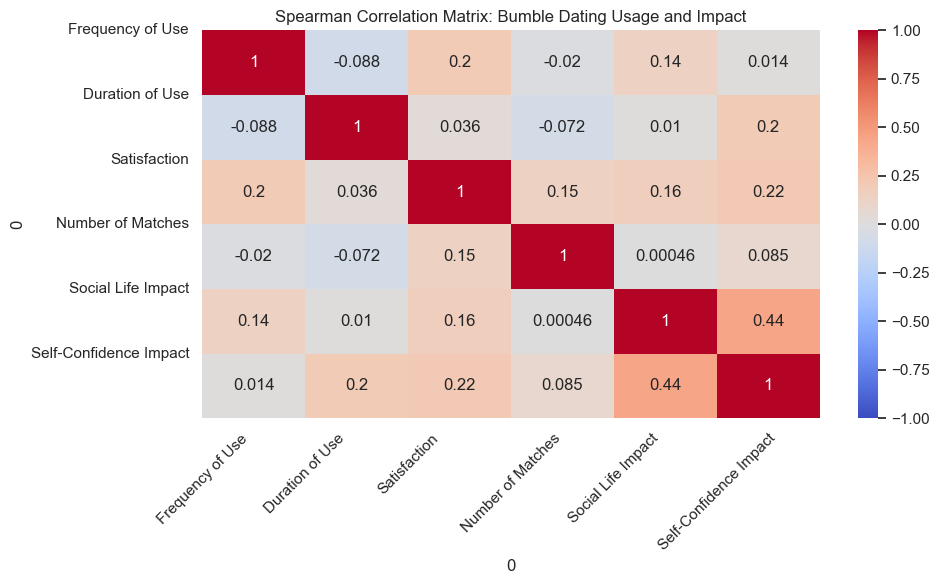

In [268]:
corr_matrix = subset.corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# rename the following, A5 - Frequency of Use, A6 - Duration of Use, D4 - Number of Matches, D13 - Social Life Impact, D14 - Self-Confidence Impact
plt.xticks(
	ticks=np.arange(len(corr_matrix.columns)),
	labels=['Frequency of Use', 'Duration of Use', 'Satisfaction', 'Number of Matches', 'Social Life Impact', 'Self-Confidence Impact'],
	rotation=45
)
plt.yticks(
	ticks=np.arange(len(corr_matrix.index)),
	labels=['Frequency of Use', 'Duration of Use', 'Satisfaction', 'Number of Matches', 'Social Life Impact', 'Self-Confidence Impact'],
	rotation=0
)
plt.title('Spearman Correlation Matrix: Bumble Dating Usage and Impact')
plt.tight_layout()
plt.savefig('spearman_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

corr_matrix.columns = ['Frequency of Use', 'Duration of Use', 'Satisfaction', 'Number of Matches', 'Social Life Impact', 'Self-Confidence Impact']
corr_matrix.index = ['Frequency of Use', 'Duration of Use', 'Satisfaction', 'Number of Matches', 'Social Life Impact', 'Self-Confidence Impact']


In [ ]:
target_features = ['D14', 'D13', 'A9']
target_corrs = corr_matrix.loc[:, target_features].drop(index=target_features)
# drop age and number of matches from target_corrs

plt.figure(figsize=(8, 6))
sns.heatmap(target_corrs, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#rename and make the label adjusted on position below
plt.xticks(
    ticks=np.arange(len(target_corrs.columns)),
    labels=['Self-Confidence Impact', 'Social Life Impact', 'Satisfaction'],
    rotation=45,
)

plt.yticks(
    ticks=np.arange(len(target_corrs.index)),
    labels=['Frequency of Use', 'Duration of Use', 'Number of Matches'],
    rotation=0
)
plt.title('Spearman Correlation with D14 (Self-Confidence Impact), D13 (Social Life), A9 (Satisfaction)')
plt.tight_layout()
plt.show()

# rename the columns of target_corrs for clarity
target_corrs.columns = ['Self-Confidence Impact', 'Social', 'Satisfaction']
target_corrs.index = ['Frequency of Use', 'Duration of Use', 'Number of Matches']
target_corrs

In [270]:
# perform correlation on age (A1) and D4 (estimated number of matches weekly)
correlation = dating[['A1', 'D4']].corr(method='spearman')
#remove the index and column names for better readability
correlation.index = ['Age', 'Number of Matches']
correlation.columns = ['Age', 'Number of Matches']
print("Correlation Matrix:")
print(correlation)
print("----------------------------------------")
print(f"Spearman correlation between age and number of matches: {correlation.iloc[0,1]:.4f}")

Correlation Matrix:
                        Age  Number of Matches
Age                1.000000           0.076487
Number of Matches  0.076487           1.000000
----------------------------------------
Spearman correlation between age and number of matches: 0.0765


In [286]:
# write bff to csv
bff.to_csv('bff uncleaned.csv', index=False)

### Analysis of Bumble BFF DataFrame

In [339]:
bff = df.loc[:, df.columns.str.startswith(('A', 'B'))]
bff = df[df['A10'] == 'BFF'].drop(columns=[col for col in df.columns if col.startswith('D')]).reset_index(drop=True)

In [340]:
bff['B14'] = bff['B14'].str.extract(r'(\d+)').astype(float).replace(np.nan, 0)

In [341]:
bff['B14']

0      1.0
1      2.0
2      3.0
3      3.0
4      4.0
5      3.0
6      5.0
7      5.0
8     10.0
9      3.0
10    10.0
11     3.0
12     5.0
13     1.0
14     5.0
15     0.0
16     0.0
17     5.0
Name: B14, dtype: float64

In [342]:
bff['B5']

0     Selective swiping - I swipe right only on prof...
1     Casual Swiping - I swipe for fun, out of bored...
2     Vibe check - I read bios, interests, photos an...
3     Selective swiping - I swipe right only on prof...
4     Selective swiping - I swipe right only on prof...
5     Vibe check - I read bios, interests, photos an...
6     Vibe check - I read bios, interests, photos an...
7     Selective swiping - I swipe right only on prof...
8     Vibe check - I read bios, interests, photos an...
9     Vibe check - I read bios, interests, photos an...
10    Vibe check - I read bios, interests, photos an...
11    Vibe check - I read bios, interests, photos an...
12    Vibe check - I read bios, interests, photos an...
13    Casual Swiping - I swipe for fun, out of bored...
14    Selective swiping - I swipe right only on prof...
15    Vibe check - I read bios, interests, photos an...
16    Casual Swiping - I swipe for fun, out of bored...
17    Casual Swiping - I swipe for fun, out of b

In [343]:

b5_map = {
    'Aggressive swiping - I swipe to maximize matches and filter later' : 1,
    'Selective swiping - I swipe right only on profiles that genuinely catch my interest' : 2,
    'Vibe check - I read bios, interests, photos and other important profile facts before deciding' : 3,
    "Mood-based swiping - I swipe depending on how I'm feeling at the very moment." : 4,
    "Strategic swiping - I swipe based on specific type or checklist in mind" : 5,
    "Casual Swiping - I swipe for fun, out of boredom. Not always looking for an immediate match." : 6,
    "No Swiping - I rarely swipe or none at all for long periods. I just wait for others to swipe then that's where I decide." : 7
}

bff['B5'] = bff['B5'].map(b5_map)
bff['B5']
# bff[['A1', 'A2','A2.1', 'A5','A6','A7','A9']]

0     2
1     6
2     3
3     2
4     2
5     3
6     3
7     2
8     3
9     3
10    3
11    3
12    3
13    6
14    2
15    3
16    6
17    6
Name: B5, dtype: int64

In [318]:
# SELECT frequency of use, duration of use, satisfaction, 
bff[['A5', 'A6', 'A9']] = subset[['A5', 'A6', 'A9']].apply(pd.to_numeric, errors='coerce')

In [324]:
bff[['A5', 'A6', 'A9']].head(3)

,A5,A6,A9
0,2,1,3
1,4,0,4
2,5,2,3


In [ ]:
bff[['B4','B9','B13','B14']]


,B4,B9,B13,B14
0,5,Yes,Yes,1.0
1,15,No,No,2.0
2,3,Yes,Yes,3.0


In [329]:
bff['B9']= bff['B9'].map({
    'Yes': 1,
    'No': 0
})
bff['B13']=bff['B13'].map({
    'Yes': 1,
    'No': 0
})

In [331]:
from scipy.stats import spearmanr, kruskal, chi2_contingency
# Group B14 by unique A5 levels for Kruskal-Wallis test dynamically
grouped_B14_by_A5 = [group['B14'] for _, group in df.groupby('A5') if len(group) > 1]

# Only run Kruskal-Wallis if we have at least two groups with more than one value
if len(grouped_B14_by_A5) >= 2:
    kruskal_result_dynamic = kruskal(*grouped_B14_by_A5)
else:
    kruskal_result_dynamic = None

# Chi-Square contingency dynamically for A5 vs B9_bin
contingency_dynamic = pd.crosstab(bff['A5'], bff['B9'])
if contingency_dynamic.shape[0] > 1 and contingency_dynamic.shape[1] > 1:
    chi2_result_dynamic = chi2_contingency(contingency_dynamic)
else:
    chi2_result_dynamic = None


#pretty print
print("Kruskal-Wallis Test Result for B14 vs A5:")
if kruskal_result_dynamic:
    print(f"Statistic: {kruskal_result_dynamic.statistic:.4f}, p-value: {kruskal_result_dynamic.pvalue:.4f}")
else:
    print("Not enough data for Kruskal-Wallis")
print("\nChi-Square Test Result for A5 vs B9:")
if chi2_result_dynamic:
    print(f"Chi-Square: {chi2_result_dynamic[0]:.4f}, p-value: {chi2_result_dynamic[1]:.4f}")
else:
    print("Not enough data for Chi-Square")

Kruskal-Wallis Test Result for B14 vs A5:
Statistic: nan, p-value: nan

Chi-Square Test Result for A5 vs B9:
Chi-Square: 4.6152, p-value: 0.3291


In [349]:
# clean b4
bff['B4'] = bff['B4'].replace(
    to_replace=r'(?i).*no clear.*', value='0', regex=True
).str.extract(r'(\d+)').fillna(0).astype(int)



In [354]:
bff[['B4','A9']]

,B4,A9
0,5,2
1,15,3
2,3,3
3,3,2
4,8,4
5,1,3
6,4,2
7,3,4
8,10,3
9,2,3


In [355]:
bff[['A2.1','A2','B8']]

,A2.1,A2,B8
0,Male,Gay,Men
1,Female,Heterosexual (straight),Men
2,Male,Bisexual,Men
3,Male,Bisexual,Men
4,Male,Heterosexual (straight),Women
5,Female,Heterosexual (straight),Women
6,Male,Heterosexual (straight),Women
7,Male,Gay,Men
8,Male,Queer,Men
9,Non-binary,pansexual,Non-binary people


In [368]:
import scipy.stats as ss
ct_gi = pd.crosstab(bff['A2.1'], bff['B8'])
chi2_gi, p_gi, dof_gi, exp_gi = ss.chi2_contingency(ct_gi)

n = ct_gi.values.sum()
cramers_v_gi = np.sqrt(chi2_gi / (n * (min(ct_gi.shape) - 1)))

print('Gender identity × Friend\'s gender')
print(ct_gi, '\n')
print(f'χ²({dof_gi}) = {chi2_gi:.2f},  p = {p_gi:.3f},  Cramérʼs V = {cramers_v_gi:.2f}')
#get chi square tabular
from scipy.stats import chi2
alpha = 0.05
critical_value_gi = chi2.ppf(1 - alpha, dof_gi)
print(f'Chi square tabular value at alpha = {alpha}: {critical_value_gi:.2f}')

Gender identity × Friend's gender
B8          Men  Non-binary people  Women
A2.1                                     
Female        1                  0      3
Male          9                  0      3
Non-binary    0                  1      1 

χ²(4) = 12.60,  p = 0.013,  Cramérʼs V = 0.59
Chi square tabular value at alpha = 0.05: 9.49


In [367]:
ct_so = pd.crosstab(bff['A2'], bff['B8'])
chi2_so, p_so, dof_so, exp_so = ss.chi2_contingency(ct_so)

n2 = ct_so.values.sum()
cramers_v_so = np.sqrt(chi2_so / (n2 * (min(ct_so.shape) - 1)))

print('\nSexual orientation × Friend\'s gender')
print(ct_so, '\n')
print(f'χ²({dof_so}) = {chi2_so:.2f},  p = {p_so:.3f},  Cramérʼs V = {cramers_v_so:.2f}')
from scipy.stats import chi2
alpha = 0.05
critical_value_so = chi2.ppf(1 - alpha, dof_so)
print(f'Chi square tabular value at alpha = {alpha}: {critical_value_so:.2f}')  




Sexual orientation × Friend's gender
B8                       Men  Non-binary people  Women
A2                                                    
Bisexual                   2                  0      0
Gay                        5                  0      0
Heterosexual (straight)    2                  0      4
Lesbian                    0                  0      1
Pansexual                  0                  0      1
Queer                      1                  0      1
pansexual                  0                  1      0 

χ²(12) = 27.99,  p = 0.006,  Cramérʼs V = 0.88
Chi square tabular value at alpha = 0.05: 21.03


In [369]:
rho, p_rho = ss.spearmanr(bff['B4'], bff['A9'], nan_policy='omit')
print("B4 (weekly matches, integer)  ↔  A9 (satisfaction 1-4)")
print(f'Spearman ρ = {rho:.2f}, p-value = {p_rho:.3f}')

B4 (weekly matches, integer)  ↔  A9 (satisfaction 1-4)
Spearman ρ = -0.06, p-value = 0.809


In [381]:
bff['B14']

0      1.0
1      2.0
2      3.0
3      3.0
4      4.0
5      3.0
6      5.0
7      5.0
8     10.0
9      3.0
10    10.0
11     3.0
12     5.0
13     1.0
14     5.0
15     0.0
16     0.0
17     5.0
Name: B14, dtype: float64

In [ ]:

bff[['B5','B14']]
# convert the B14 count of friends to categories
# 12 bin edges -> 11 labels
bff['B14']= pd.cut(
    bff['B14'],
    bins=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, np.inf],
    labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '10+'],
    right=True
)


In [ ]:
#perform kruskal wallis h test for B14 and B5
bff['B5'] = bff['B5']
bff['B14'] = bff['B14']
kruskal_result_B14_B5 = kruskal(bff['B14'], bff['B5'])
print("\nKruskal-Wallis Test Result for B14 vs B5:")
print(f"Statistic: {kruskal_result_B14_B5.statistic:.4f}, p-value: {kruskal_result_B14_B5.pvalue:.4f}")